<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/PSI5892_LMS_HA_20251006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

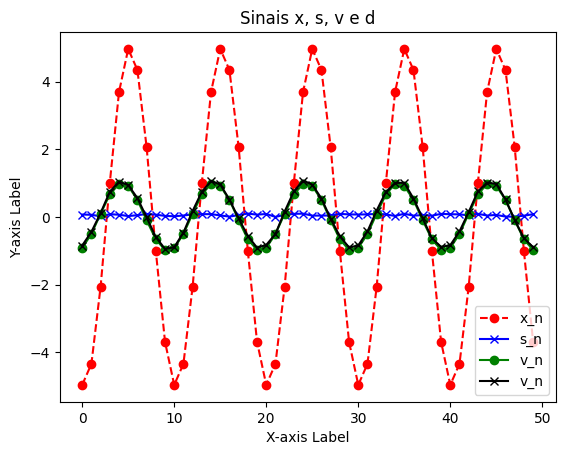

In [11]:
"""
PSI589 - Fundamentos de Adaptação e Aprendizado de Máquina
Aluno: Heitor Albuquerque
Exercício Algoritmo LMS
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

"""
# M : numero de coeficientes
M = 2

# Matriz R
# R_xx(k) = 25/2 * cos*(2*pi*k/10)

# Vetor R_xx
R_xx = np.zeros(M)
R_xx = R_xx.reshape(1,-1)
print("R_xx é: \n", R_xx)

for index in range (M):
  R_xx[1, index] = (25/2)*np.cos(2*np.pi*index/10)

print("R_xx é: \n", R_xx)
"""

N = 500
var_s = 0.01

n = np.arange(N)
n = n.reshape(-1,1)

# phi_x é fase aleatória inicial
phi_x = np.random.rand(1,1)*2*np.pi

# 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
x_n = 5*np.sin(2*np.pi*n/10+phi_x)
x_n = x_n.reshape(-1,1)

# 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
v_n = np.sin(2*np.pi*n/10+np.pi/6+phi_x)
v_n = v_n.reshape(-1,1)

# s : ruido gaussinao com 𝜎^2=0,01
s_n = np.random.rand(N)*np.sqrt(var_s)
s_n = s_n.reshape(-1,1)

# d: desired signal
# d = s_n + v_n
d_n = s_n + v_n

plt.plot(n[:50], x_n[:50], color='red', linestyle='--', marker='o', label='x_n')
plt.plot(n[:50], s_n[:50], color='blue', linestyle='-', marker='x', label='s_n')
plt.plot(n[:50], v_n[:50], color='green', linestyle='-', marker='o', label='v_n')
plt.plot(n[:50], d_n[:50], color='black', linestyle='-', marker='x', label='v_n')

plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Sinais x, s, v e d")
plt.legend()
plt.show() # Displays the plot


In [12]:
# gerar função de wiener

def Wiener_HA(x: np.ndarray, d: np.ndarray, M: int):
  R = np.zeros((M,M))
  p = np.zeros(M)
  p = p.reshape(-1,1)

  x_M = np.zeros(M)
  x_M = x_M.reshape(-1,1)

  # numero de amostras
  N = x.shape[0]

  for index_W in range (N):
      # vetor x dentro do loop

      x_M[1:M] = x_M[0:M-1]
      x_M[0] = x[index_W]

#      print("Valores de x_M \n", x_M)

      # Tamanho de R (Nx1) (1xN) = NxN
      R = R + x_M@x_M.T

#      print("Valores de R \n", R)
      p = p + x_M * d[index_W]

#      print("Valores de p \n", p)

  R = R/N
  p = p/N

  # 𝐰o=𝐑−1𝐩

  w_o = np.linalg.solve(R, p)

  return w_o, R, p



In [13]:
"""
  Exercício
  Fazer o cálculo para M = 2 N  = 500

 """
 # os vetores x_n e d_n já haviam sido previamente criados com N = 500

M=2

w_o, R, p = Wiener_HA(x_n, d_n, M)

print("\nValores de R\n", R)
print("\nValores de p\n", p)
print("\nValores de wo\n", w_o)

# R teorico
R_t = [[25/2, (25/2)*np.cos(2*np.pi/10)], [(25/2)*np.cos(2*np.pi/10), 25/2]]
print("\nValores de R teorico\n", R_t)

# p teorico
p_t = [[25/2, (25/2)*np.cos(2*np.pi/10+np.pi/6)]]
print("\nValores de p teorico\n", p_t)


Valores de R
 [[12.5        10.07600298]
 [10.07600298 12.47271196]]

Valores de p
 [[2.16923654]
 [1.01371517]]

Valores de wo
 [[ 0.30969321]
 [-0.1689091 ]]

Valores de R teorico
 [[12.5, np.float64(10.112712429686843)], [np.float64(10.112712429686843), 12.5]]

Valores de p teorico
 [[12.5, np.float64(5.084208038447505)]]


In [14]:
# Calculo da variância de d

# obtemos a média de d
mhu = np.sum(d_n)/(N-1)

# calculo do desvio de d
sigma_d = d_n - mhu

# calculo da variancia de d
var_d = np.sum(sigma_d ** 2)/(N-1)

# Jmin
Jmin = var_d - p.T @ w_o

print("\nJmin = ", Jmin)
print("\nVar_s = ", var_s)


Jmin =  [[0.00277494]]

Var_s =  0.01



Valores do filtro sao 
 [[ 0.30969321]
 [-0.1689091 ]]

Dimensoes de h (2, 1)

Valores dos indices da exponencial 
 [[0]
 [1]]

Valores dos coeficientes da exponencial 
 [[1.        +0.j        ]
 [0.80901699-0.58778525j]]

Dimensoes da exponencial (2, 1)
Valor de H_InterFreq [[0.17304288+0.09928228j]]

Valores do fase estimada 
 [[0.52088969]]

Valores da magnitude estimada 
 [[0.1995014]]

O filtro H corrige a diferença de fase e de amplitude entre o sinal de entrada e o sinal desejado.

Dimensoes de w_ (512, 1)

Dimensoes de H (1, 512)

Dimensoes de fase (1, 512)

Dimensoes de magnitude (1, 512)
Dimensoes de H (1, 512)
Tipo de H <class 'numpy.ndarray'>

Parte real de H de 2p/10 [0.25670951]

Parte imag de H de 2p/10 [0.16038395]

Fase de H de 2p/10 [0.55843264]

Magnitude de H de 2p/10 [0.30269256]

O valor de k em 2pi/10 é  102

O valor de fase em 2pi/10 é  [0.55843264]

O valor de magnitude em 2pi/10 é  [0.30269256]


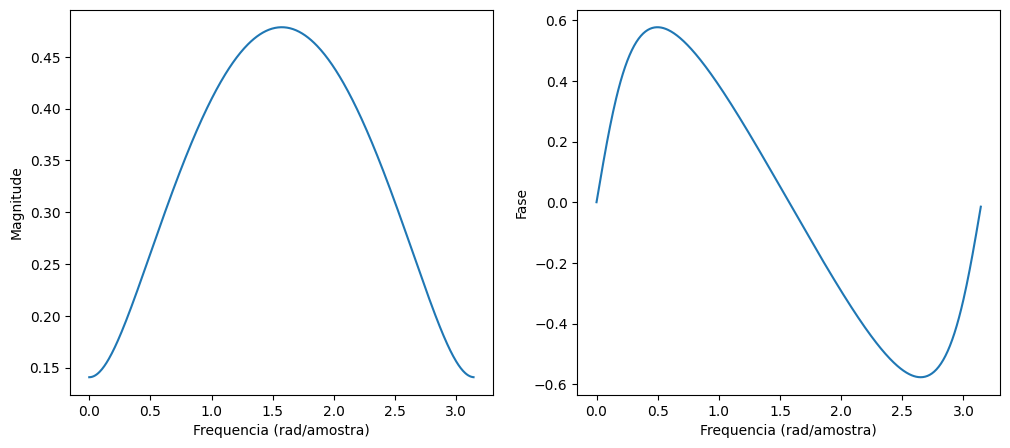

In [15]:
"""

Resposta em frequencia do filtor é obtida pelos coeficientes do filtro(w_o) multiplicados por e^(jwt)

Para avaliar na frequência de interferência basta substituir w por w_interf

w_interf = 2*np.pi/10

"""
h = np.array([w_o[0], w_o[1]])
#h = h.reshape(1,-1)
print("\nValores do filtro sao \n", h)
print("\nDimensoes de h", h.shape)

k_exp = np.arange(M)
k_exp = k_exp.reshape(-1,1)
print("\nValores dos indices da exponencial \n", k_exp)

e_jw = np.exp(1j*-2*np.pi*k_exp/10)
print("\nValores dos coeficientes da exponencial \n", e_jw)
print("\nDimensoes da exponencial", e_jw.shape)

# Computando phase e magnitude em w = 2pi/10

H_InterFreq = np.dot(h.T,e_jw)
print("Valor de H_InterFreq", H_InterFreq)


faseEst = np.angle(H_InterFreq)
print("\nValores do fase estimada \n", faseEst)

magnitudeEst = np.abs(H_InterFreq)
print("\nValores da magnitude estimada \n", magnitudeEst)

print("\nO filtro H corrige a diferença de fase e de amplitude entre o sinal de entrada e o sinal desejado.")

# Solução por fft
w_ = np.linspace(0,np.pi,512)
w_ = w_.reshape(-1,1)
print("\nDimensoes de w_", w_.shape)

# Resposta em frequência H(jw)
H = np.fft.fft(h.T,512)
#print("\nEsses são os valores da resposta em frequência H(jw)\n", H)
print("\nDimensoes de H", H.shape)

phase = np.angle(H)
#print("\nO valor de phase é: \n", phase)
print("\nDimensoes de fase", phase.shape)

magnitude = np.abs(H)
#print("\nO valor de magnitude é: ", magnitude)
print("\nDimensoes de magnitude", magnitude.shape)



plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(w_,magnitude.T)
plt.xlabel("Frequencia (rad/amostra)")
plt.ylabel("Magnitude")

plt.subplot(1,2,2)
plt.plot(w_,phase.T)
plt.xlabel("Frequencia (rad/amostra)")
plt.ylabel("Fase")

print("Dimensoes de H", H.shape)
print("Tipo de H", type(H))
print("\nParte real de H de 2p/10", H.T[102].real)
print("\nParte imag de H de 2p/10", H.T[102].imag)
print("\nFase de H de 2p/10", np.angle(H.T[102]))
print("\nMagnitude de H de 2p/10", np.abs(H.T[102]))


# para a frequencia angular de 2*pi/10 obtemos a magnitude e phase
k_wo = int(512*(np.pi/5)/(np.pi))

print("\nO valor de k em 2pi/10 é ", k_wo)

phase_kwo = phase.T[k_wo]
print("\nO valor de fase em 2pi/10 é ", phase_kwo)

magnitude_kwo = magnitude.T[k_wo]
print("\nO valor de magnitude em 2pi/10 é ", magnitude_kwo)






In [16]:
# Item b

# Autovalores da matriz R

autoval, autovec = LA.eig(R)

print("\nOs autovalores de R são\n", autoval)

lambda_max = np.max(autoval)
print("\nLambda max\n", lambda_max)

etha_max = 2/lambda_max
print("\nEtha max\n", etha_max)

print("\nEtha deve ficar entre 0 e", etha_max)


Os autovalores de R são
 [22.5623682   2.41034376]

Lambda max
 22.56236820078194

Etha max
 0.08864317709036795

Etha deve ficar entre 0 e 0.08864317709036795



Numero de iterações 500

Numero de coeficientes 2

Dimensao de w_lms (2, 500)

Dimensao de y_lms (500, 1)

Dimensao de e_lms (500, 1)

Valores de y_lms [-0.11900269]

Valor de erro [-0.44228923]

Valor do filtro LMS [ 0.30860122 -0.16942783]

Dimensão x_cont
 (2, 500)


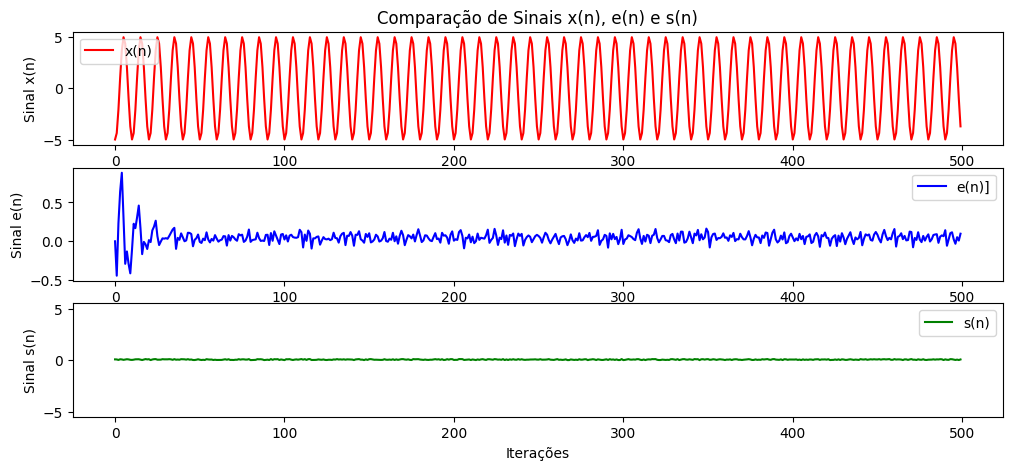

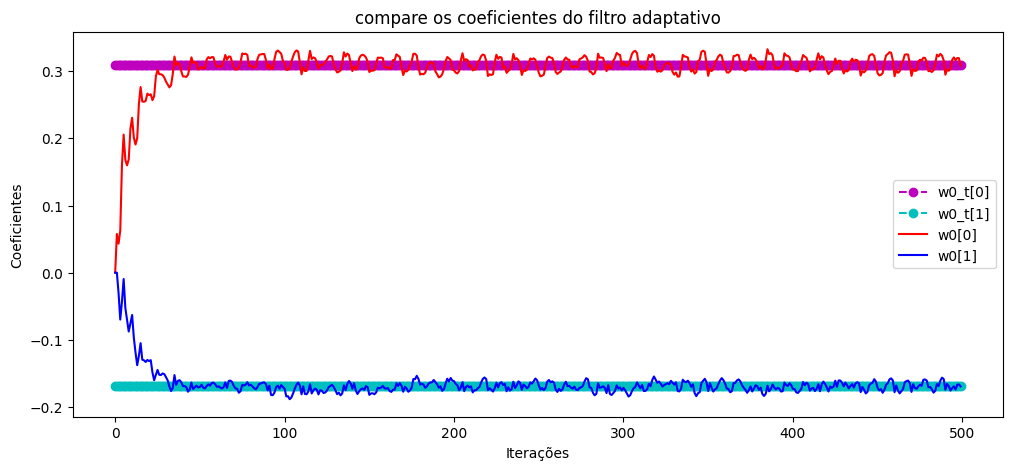

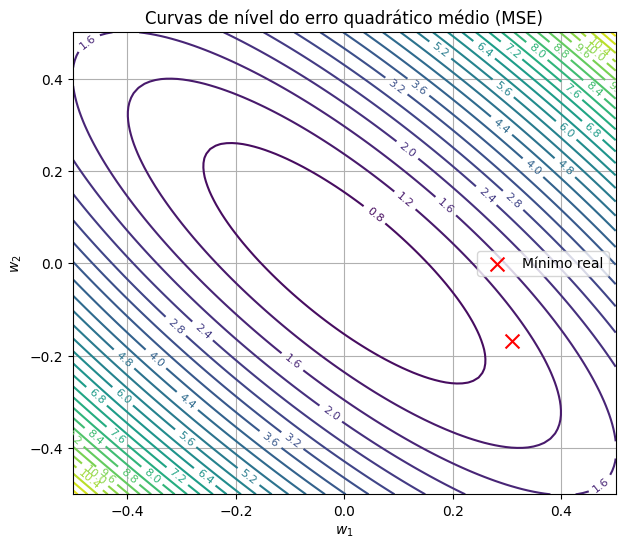

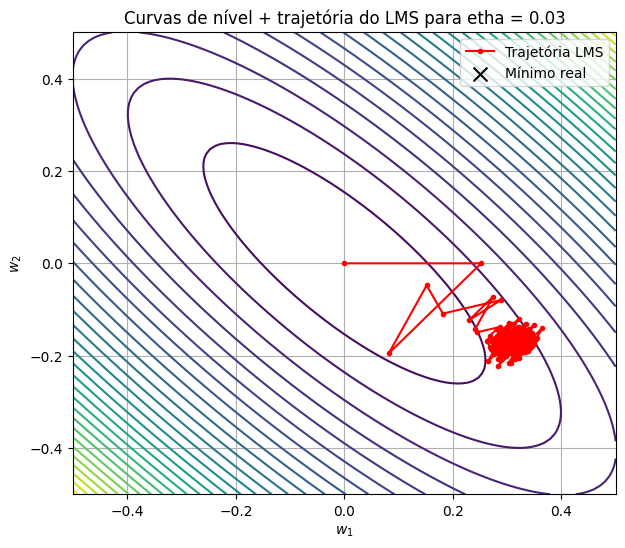

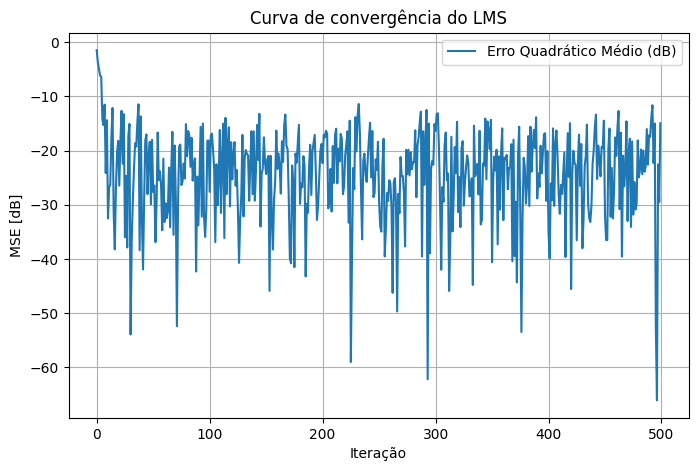

In [26]:
# Item c

"""
Algoritmo 1 Sumário do algoritmo LMS.

Inicialização: w(0)=0

   Para n = 1,2,...
 calcule:

  y(n) = x.T(n)w(n-1)
  e(n) = d(n)-y(n)
  w(n) = w(n-1)+etha e(n) x(n)

   Fim
"""
# Numero de iterações
N_lms = x_n.shape[0]
print("\nNumero de iterações", N_lms)

# Numero de coeficientes
Nc = h.shape[0]
print("\nNumero de coeficientes", Nc)

# etha = 0.03
etha_lms = 0.03

# Inicialização w(0)=0
w_lms = np.zeros((2, N_lms))
print("\nDimensao de w_lms", w_lms.shape)


#print("Dimensões de x", x_n.shape)


y_lms = np.zeros(N_lms)
y_lms = y_lms.reshape(-1,1)
print("\nDimensao de y_lms", y_lms.shape)

# vetor com as M amostras de entrada (x(n) x(n-1)... x(n-M))
x_lms_M = np.zeros(M)
x_lms_M = x_lms_M.reshape(-1,1)


# vetor desejado
#d_n = d_n.reshape(-1,1)
#print("\nDimensao de d_n", d_n.shape)

# vetor erro
e_lms = np.zeros(N_lms)
e_lms = e_lms.reshape(-1,1)
print("\nDimensao de e_lms", e_lms.shape)

# filtro temporário
w_lms_M = np.zeros(2)
w_lms_M = w_lms_M.reshape(-1,1)


for index_lms in range (1, N_lms):
  x_lms_M[1:] = x_lms_M[0:M-1]
  x_lms_M[0] = x_n[index_lms]

  #print("\nDimensao x_lms\n", x_lms_M.shape)

  w_lms_M = w_lms[:, index_lms-1]
 # w_lms_M = w_lms_M.reshape(-1,1)
  #print("\nDimensao w_lms_M\n", w_lms_M.shape)

# y_lms[index_lms] = np.dot(x_lms_M.T, w_lms_M.T)
  y_lms[index_lms] = x_lms_M.T @ w_lms_M

  # print("\nValor de d_n", d_n[index_lms])

  e_lms[index_lms] = d_n[index_lms] - y_lms[index_lms]
  #print("\nDimensao e_lms\n", e_lms.shape)

  w_lms[:,index_lms] = w_lms_M + etha_lms * e_lms[index_lms] * x_lms_M.flatten()

print("\nValores de y_lms", y_lms[2])
print("\nValor de erro", e_lms[1])
print("\nValor do filtro LMS", w_lms[:,-1])


# observe inicialmente os sinais de entrada  𝑥(𝑛) , de erro  𝑒(𝑛)  e  𝑠(𝑛)  em gráficos na mesma escala;

# eixo x
t_lms = np.arange(N_lms)

plt.figure(figsize=(12,5))
plt.subplot(3,1,1)
plt.title("Comparação de Sinais x(n), e(n) e s(n)")
plt.plot(t_lms,x_n, color='red', linestyle='-',  label='x(n)')
plt.xlabel("Iterações")
plt.ylabel("Sinal x(n)")
plt.ylim(-5.5, 5.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(t_lms,e_lms, color='blue', linestyle='-', label='e(n)]')
plt.xlabel("Iterações")
plt.ylabel("Sinal e(n)")
plt.legend()

plt.subplot(3,1,3)
plt.plot(t_lms,s_n, color='green', linestyle='-', label='s(n)')
plt.xlabel("Iterações")
plt.ylabel("Sinal s(n)")
plt.ylim(-5.5, 5.5)
plt.legend()



# compare os coeficientes do filtro adaptativo com os coeficientes ótimos calculados no item a, fazendo um gráfico dos coeficientes ao longo das iterações;




# coeficientes teoricos
w0_t0 = np.ones((M, N_lms))*w_o
#w0_t0.flatten()
#w0_t1 = np.ones(N_lms)*k_wo[1]
#w0_t1.flatten()


plt.figure(figsize=(12,5))


plt.plot(t_lms, w0_t0[0,:], color='m', linestyle='--', marker='o', label='w0_t[0]')
plt.plot(t_lms, w0_t0[1,:], color='c', linestyle='--', marker='o', label='w0_t[1]')


plt.plot(t_lms,w_lms[0,:], color='red', linestyle='-',  label='w0[0]')
plt.plot(t_lms,w_lms[1,:], color='blue', linestyle='-', label='w0[1]')

plt.title("compare os coeficientes do filtro adaptativo")
plt.xlabel("Iterações")
plt.ylabel("Coeficientes")
plt.legend()




# trace as curvas de nível da superfície de erro e sobre elas, a trajetória dos coeficientes;

w_true = w_o

x_cont = np.zeros((2,N))
print("\nDimensão x_cont\n", x_cont.shape)
x_cont[0,:] = x_n.flatten()
x_cont[1,1:] = x_n[0:-1].flatten()

#  Grade de coeficientes
w1_vals = np.linspace(-0.5, 0.5, 100)
w2_vals = np.linspace(-0.5, 0.5, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Cálculo do erro quadrático médio (superfície de custo)
J = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w = np.array([W1[i, j], W2[i, j]])
        y_cont = w @ x_cont
        e = d_n - y_cont
        J[i, j] = np.mean(e**2)



# Plot das curvas de nível
plt.figure(figsize=(7,6))
contours = plt.contour(W1, W2, J, levels=30)
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Curvas de nível do erro quadrático médio (MSE)')
plt.scatter(w_true[0], w_true[1], color='red', marker='x', s=100, label='Mínimo real')
plt.legend()
plt.grid(True)
plt.show()

# Execução do LMS para pegar a trajetória
etha_lms = 0.03
w = np.zeros(2)
traj = [w.copy()]
mse = np.zeros(N)

for n in range(N):
    y = w @ x_cont[:, n]
    e = d_n[n] - y
    w = w + 2 * etha_lms * e * x_cont[:, n]
    traj.append(w.copy())
    mse[n] = np.mean(e[:n+1]**2)

traj = np.array(traj)

#  Adiciona trajetória no gráfico
plt.figure(figsize=(7,6))
plt.contour(W1, W2, J, levels=30)
plt.plot(traj[:,0], traj[:,1], 'r.-', label='Trajetória LMS')
plt.scatter(w_true[0], w_true[1], color='black', marker='x', s=100, label='Mínimo real')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.legend()
plt.title('Curvas de nível + trajetória do LMS para etha = 0.03')
plt.grid(True)
plt.show()

# erro quadrático médio em dB
mse_db = 10 * np.log10(mse + 1e-12)  # evita log(0)

plt.figure(figsize=(8,5))
plt.plot(mse_db, label='Erro Quadrático Médio (dB)')
plt.xlabel('Iteração')
plt.ylabel('MSE [dB]')
plt.title('Curva de convergência do LMS')
plt.grid(True)
plt.legend()
plt.show()


# Determine experimentalmente o valor máximo de para convergência do algoritmo LMS
# e compare-o com o valor calculado no item b para o algoritmo Steepest Descent.